In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("UN_city_pop_projections_long.csv")

In [3]:
df

,Unnamed: 0,Region,Country_Code,Country_or_area,City_Code,City,City_Definition,Latitude,Longitude,year,population
0,0,Africa,12,Algeria,20009,Annaba,Urban Agglomeration,36.900000,7.766670,1950,99.741
1,1,Africa,12,Algeria,20011,Batna,City Proper,35.555970,6.174140,1950,13.046
2,2,Africa,12,Algeria,20015,Blida,Urban Agglomeration,36.480781,2.831943,1950,33.970
3,3,Africa,12,Algeria,20006,El Djazaïr (Algiers),Urban Agglomeration,36.752500,3.041970,1950,516.450
4,4,Africa,12,Algeria,20020,El Djelfa,Urban Agglomeration,34.672790,3.263000,1950,10.450
...,...,...,...,...,...,...,...,...,...,...,...
19001,19001,Africa,894,Zambia,23277,Lusaka,Urban Agglomeration,-15.413374,28.277148,2035,5182.669
19002,19002,Africa,894,Zambia,23279,Ndola,City Proper,-12.958670,28.636590,2035,925.726
19003,19003,Africa,716,Zimbabwe,22510,Bulawayo,City Proper,-20.150000,28.583330,2035,874.479
19004,19004,Africa,716,Zimbabwe,22511,Chitungwiza,City Proper,-18.012740,31.075550,2035,552.027


In [4]:

df_new = df[df['Country_or_area'] == 'Zimbabwe']
 
print(df_new)

       Unnamed: 0  Region  Country_Code Country_or_area  City_Code  \
218           218  Africa           716        Zimbabwe      22510   
219           219  Africa           716        Zimbabwe      22511   
220           220  Africa           716        Zimbabwe      22513   
439           439  Africa           716        Zimbabwe      22510   
440           440  Africa           716        Zimbabwe      22511   
...           ...     ...           ...             ...        ...   
18783       18783  Africa           716        Zimbabwe      22511   
18784       18784  Africa           716        Zimbabwe      22513   
19003       19003  Africa           716        Zimbabwe      22510   
19004       19004  Africa           716        Zimbabwe      22511   
19005       19005  Africa           716        Zimbabwe      22513   

              City City_Definition  Latitude  Longitude  year  population  
218       Bulawayo     City Proper -20.15000   28.58333  1950      91.635  
219    

In [5]:
df_new.isnull().sum()

Unnamed: 0         0
Region             0
Country_Code       0
Country_or_area    0
City_Code          0
City               0
City_Definition    0
Latitude           0
Longitude          0
year               0
population         0
dtype: int64

In [6]:
df1=df_new.drop(columns =['Unnamed: 0',
'Region',
'Country_Code',
'Country_or_area',
'City_Code',

'City_Definition',

])

In [7]:

df2 = df1[df1['year'] <= 2023]

df2 = df2.reset_index()


In [8]:
df2

,index,City,Latitude,Longitude,year,population
0,218,Bulawayo,-20.15000,28.58333,1950,91.635
1,219,Chitungwiza,-18.01274,31.07555,1950,38.645
2,220,Harare,-17.82935,31.05389,1950,142.652
3,439,Bulawayo,-20.15000,28.58333,1951,92.200
4,440,Chitungwiza,-18.01274,31.07555,1951,40.487
...,...,...,...,...,...,...
217,16131,Chitungwiza,-18.01274,31.07555,2022,397.149
218,16132,Harare,-17.82935,31.05389,2022,1557.740
219,16351,Bulawayo,-20.15000,28.58333,2023,649.509
220,16352,Chitungwiza,-18.01274,31.07555,2023,403.714


In [9]:
df2 = df2.drop(columns=['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

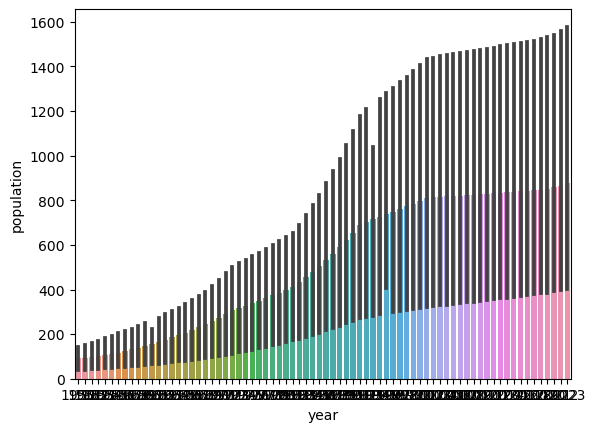

In [10]:
import seaborn as sns
sns.barplot(x="year",y="population",data=df2)

<AxesSubplot:xlabel='year', ylabel='population'>

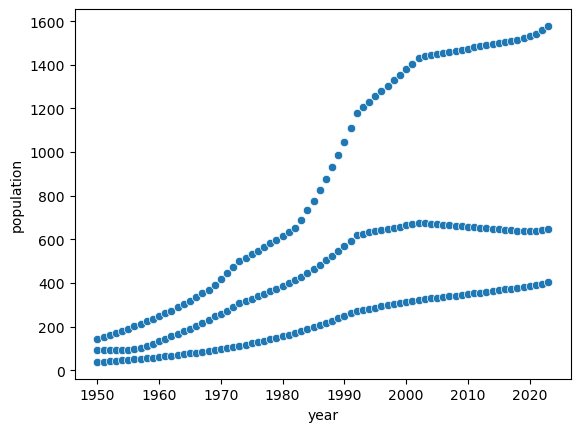

In [11]:
sns.scatterplot(data=df2,x="year",y="population")

array([[<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'population'}>]], dtype=object)

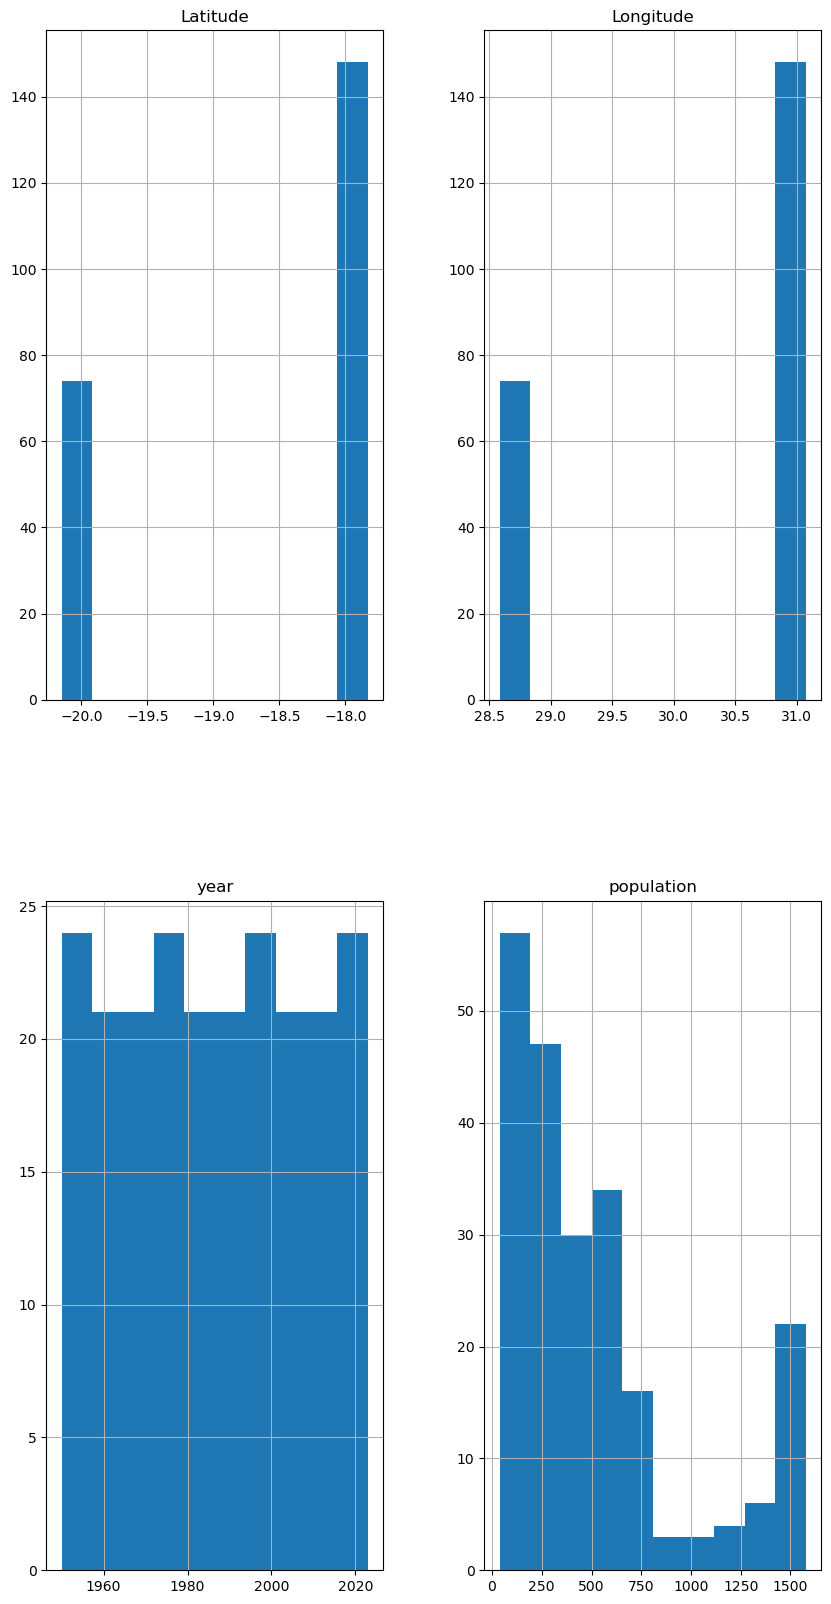

In [12]:
df2.hist(figsize=(10,20))

                Latitude     Longitude          year  population
Latitude    1.000000e+00  9.969053e-01  6.493545e-16    0.163996
Longitude   9.969053e-01  1.000000e+00 -5.591378e-15    0.114286
year        6.493545e-16 -5.591378e-15  1.000000e+00    0.639569
population  1.639962e-01  1.142863e-01  6.395690e-01    1.000000


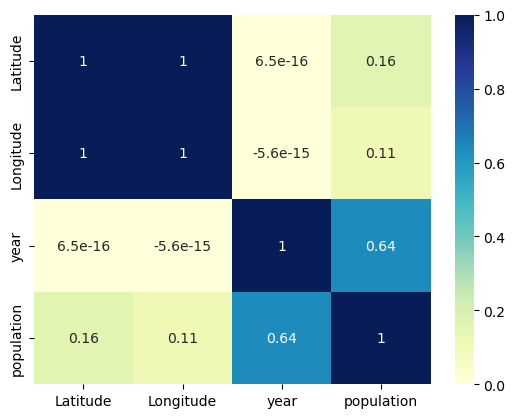

In [13]:
import seaborn as sb

# import modules
import matplotlib.pyplot as mp
print(df2.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [14]:
df3 = pd.get_dummies(df2, columns = ['City'])
df3


,Latitude,Longitude,year,population,City_Bulawayo,City_Chitungwiza,City_Harare
0,-20.15000,28.58333,1950,91.635,1,0,0
1,-18.01274,31.07555,1950,38.645,0,1,0
2,-17.82935,31.05389,1950,142.652,0,0,1
3,-20.15000,28.58333,1951,92.200,1,0,0
4,-18.01274,31.07555,1951,40.487,0,1,0
...,...,...,...,...,...,...,...
217,-18.01274,31.07555,2022,397.149,0,1,0
218,-17.82935,31.05389,2022,1557.740,0,0,1
219,-20.15000,28.58333,2023,649.509,1,0,0
220,-18.01274,31.07555,2023,403.714,0,1,0


In [15]:
X_train = df3[['City_Bulawayo',
'City_Chitungwiza',
'City_Harare',
'Latitude',
'Longitude',
'year']]
y_train = df3['population']

In [16]:
model = LinearRegression()



In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
predict_train = model.predict(X_train)
predict_train

array([-3.25937500e+01, -2.60933594e+02,  4.14980469e+02, -1.96035156e+01,
       -2.47943359e+02,  4.27970703e+02, -6.61132812e+00, -2.34951172e+02,
        4.40962891e+02,  6.38085938e+00, -2.21958984e+02,  4.53955078e+02,
        1.93730469e+01, -2.08966797e+02,  4.66947266e+02,  3.23632812e+01,
       -1.95976562e+02,  4.79937500e+02,  4.53554688e+01, -1.82984375e+02,
        4.92929688e+02,  5.83476562e+01, -1.69992188e+02,  5.05921875e+02,
        7.13398438e+01, -1.57000000e+02,  5.18914062e+02,  8.43300781e+01,
       -1.44009766e+02,  5.31904297e+02,  9.73222656e+01, -1.31017578e+02,
        5.44896484e+02,  1.10314453e+02, -1.18025391e+02,  5.57888672e+02,
        1.23306641e+02, -1.05033203e+02,  5.70880859e+02,  1.36296875e+02,
       -9.20429688e+01,  5.83871094e+02,  1.49289062e+02, -7.90507812e+01,
        5.96863281e+02,  1.62281250e+02, -6.60585938e+01,  6.09855469e+02,
        1.75273438e+02, -5.30664062e+01,  6.22847656e+02,  1.88263672e+02,
       -4.00761719e+01,  

In [19]:

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predict_train)



32439.448159405256

In [20]:
from sklearn.metrics import r2_score
er1=r2_score(y_train,predict_train)
er1

0.8276886298918068

Random forest

In [21]:

regressor1 = RandomForestRegressor(n_estimators =10 , random_state = 0)
regressor1.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
y_pred_random=regressor1.predict(X_train)

In [23]:
from sklearn.metrics import r2_score
er3=r2_score(y_train,y_pred_random)
er3

0.9999031660368102

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred_random)

18.230023514955

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 27)
x_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression()

In [26]:
y_pred1=regressor.predict(poly_reg.transform(X_train))

In [27]:
from sklearn.metrics import r2_score
er2=r2_score(y_train,y_pred1)
er2

0.9952470058328985

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred1)

894.801705707717

In [29]:
df4= df1[df1['year'] >= 2023]

In [30]:
df4= df4.reset_index()
df4 = df4.drop(columns=['index'])
df4

,City,Latitude,Longitude,year,population
0,Bulawayo,-20.15000,28.58333,2023,649.509
1,Chitungwiza,-18.01274,31.07555,2023,403.714
2,Harare,-17.82935,31.05389,2023,1578.128
3,Bulawayo,-20.15000,28.58333,2024,658.028
4,Chitungwiza,-18.01274,31.07555,2024,411.186
5,Harare,-17.82935,31.05389,2024,1603.201
6,Bulawayo,-20.15000,28.58333,2025,668.949
7,Chitungwiza,-18.01274,31.07555,2025,419.611
8,Harare,-17.82935,31.05389,2025,1633.019
9,Bulawayo,-20.15000,28.58333,2026,682.123


In [31]:
df5= pd.get_dummies(df4, columns = ['City'])
df5


,Latitude,Longitude,year,population,City_Bulawayo,City_Chitungwiza,City_Harare
0,-20.15000,28.58333,2023,649.509,1,0,0
1,-18.01274,31.07555,2023,403.714,0,1,0
2,-17.82935,31.05389,2023,1578.128,0,0,1
3,-20.15000,28.58333,2024,658.028,1,0,0
4,-18.01274,31.07555,2024,411.186,0,1,0
5,-17.82935,31.05389,2024,1603.201,0,0,1
6,-20.15000,28.58333,2025,668.949,1,0,0
7,-18.01274,31.07555,2025,419.611,0,1,0
8,-17.82935,31.05389,2025,1633.019,0,0,1
9,-20.15000,28.58333,2026,682.123,1,0,0


In [32]:
X_test= df5[['City_Bulawayo',
'City_Chitungwiza',
'City_Harare',
'Latitude',
'Longitude',
'year']]
y_test = df5['population']

In [33]:
y_pop=df5[['population','year','City_Bulawayo',
'City_Chitungwiza',
'City_Harare']]
y_pop

,population,year,City_Bulawayo,City_Chitungwiza,City_Harare
0,649.509,2023,1,0,0
1,403.714,2023,0,1,0
2,1578.128,2023,0,0,1
3,658.028,2024,1,0,0
4,411.186,2024,0,1,0
5,1603.201,2024,0,0,1
6,668.949,2025,1,0,0
7,419.611,2025,0,1,0
8,1633.019,2025,0,0,1
9,682.123,2026,1,0,0


In [34]:
Y_test_linear=model.predict(X_test)

In [35]:
Y_test_linear

array([ 915.79882812,  687.45898438, 1363.37304688,  928.79101562,
        700.45117188, 1376.36523438,  941.78320312,  713.44335938,
       1389.35742188,  954.77539062,  726.43554688, 1402.34960938,
        967.765625  ,  739.42578125, 1415.33984375,  980.7578125 ,
        752.41796875, 1428.33203125,  993.75      ,  765.41015625,
       1441.32421875, 1006.7421875 ,  778.40234375, 1454.31640625,
       1019.73242188,  791.39257812, 1467.30664062, 1032.72460938,
        804.38476562, 1480.29882812, 1045.71679688,  817.37695312,
       1493.29101562, 1058.70898438,  830.36914062, 1506.28320312,
       1071.69921875,  843.359375  , 1519.2734375 ])

In [36]:
predicted = pd.DataFrame(Y_test_linear,columns=['predicted'])

In [37]:
df_linear_regression = pd.merge(y_pop,predicted,how = 'left',left_index = True, right_index = True)

In [38]:
df_linear_regression

,population,year,City_Bulawayo,City_Chitungwiza,City_Harare,predicted
0,649.509,2023,1,0,0,915.798828
1,403.714,2023,0,1,0,687.458984
2,1578.128,2023,0,0,1,1363.373047
3,658.028,2024,1,0,0,928.791016
4,411.186,2024,0,1,0,700.451172
5,1603.201,2024,0,0,1,1376.365234
6,668.949,2025,1,0,0,941.783203
7,419.611,2025,0,1,0,713.443359
8,1633.019,2025,0,0,1,1389.357422
9,682.123,2026,1,0,0,954.775391


In [39]:
Bulawayo=df_linear_regression[df_linear_regression['City_Bulawayo'] == 1]

Bulawayo= Bulawayo.reset_index()
Bulawayo_df=Bulawayo.drop(columns =['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

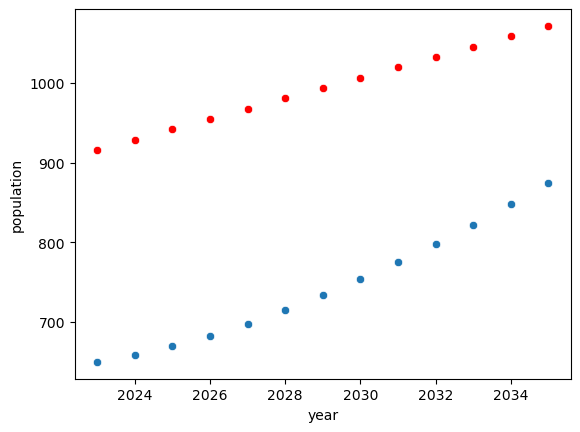

In [40]:
sns.scatterplot(data=Bulawayo_df,x="year",y="population")
sns.scatterplot(data=Bulawayo_df,x="year",y="predicted",color='red')

In [41]:
Y_test_random=regressor1.predict(X_test)


In [42]:
predicted_random = pd.DataFrame(Y_test_random,columns=['predicted_random'])

In [43]:
predicted_random

,predicted_random
0,648.1785
1,401.8290
2,1570.8672
3,648.1785
4,401.8290
5,1570.8672
6,648.1785
7,401.8290
8,1570.8672
9,648.1785


In [44]:
df_random_forest = pd.merge(y_pop,predicted_random,how = 'left',left_index = True, right_index = True)

In [45]:
df_random_forest

,population,year,City_Bulawayo,City_Chitungwiza,City_Harare,predicted_random
0,649.509,2023,1,0,0,648.1785
1,403.714,2023,0,1,0,401.8290
2,1578.128,2023,0,0,1,1570.8672
3,658.028,2024,1,0,0,648.1785
4,411.186,2024,0,1,0,401.8290
5,1603.201,2024,0,0,1,1570.8672
6,668.949,2025,1,0,0,648.1785
7,419.611,2025,0,1,0,401.8290
8,1633.019,2025,0,0,1,1570.8672
9,682.123,2026,1,0,0,648.1785


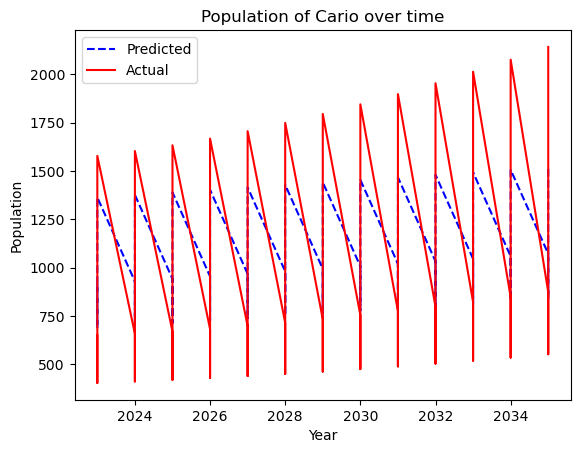

In [46]:
plt.plot(df_random_forest['year'],predicted, color='blue',linestyle='dashed', label='Predicted')
plt.plot(df_random_forest['year'],df_random_forest['population'], color='red', label='Actual')
plt.title("Population of Cario over time")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.show()

In [47]:
y_pred_poly=regressor.predict(poly_reg.transform(X_test))

In [48]:
predicted_poly = pd.DataFrame(y_pred_poly,columns=['predicted_poly'])

In [49]:
df_poly = pd.merge(y_pop,predicted_poly,how = 'left',left_index = True, right_index = True)

In [50]:
df_poly

,population,year,City_Bulawayo,City_Chitungwiza,City_Harare,predicted_poly
0,649.509,2023,1,0,0,616.398348
1,403.714,2023,0,1,0,415.137861
2,1578.128,2023,0,0,1,1482.937322
3,658.028,2024,1,0,0,609.797947
4,411.186,2024,0,1,0,425.938593
5,1603.201,2024,0,0,1,1462.533620
6,668.949,2025,1,0,0,603.276612
7,419.611,2025,0,1,0,438.088881
8,1633.019,2025,0,0,1,1439.278743
9,682.123,2026,1,0,0,596.932146


In [51]:
Bulawayo=df_poly[df_poly['City_Bulawayo'] == 1]
Bulawayo

,population,year,City_Bulawayo,City_Chitungwiza,City_Harare,predicted_poly
0,649.509,2023,1,0,0,616.398348
3,658.028,2024,1,0,0,609.797947
6,668.949,2025,1,0,0,603.276612
9,682.123,2026,1,0,0,596.932146
12,697.347,2027,1,0,0,590.869193
15,714.397,2028,1,0,0,585.199471
18,733.107,2029,1,0,0,580.042010
21,753.306,2030,1,0,0,575.523382
24,774.894,2031,1,0,0,571.777959
27,797.799,2032,1,0,0,568.948164


In [52]:
Bulawayo= Bulawayo.reset_index()
Bulawayo


,index,population,year,City_Bulawayo,City_Chitungwiza,City_Harare,predicted_poly
0,0,649.509,2023,1,0,0,616.398348
1,3,658.028,2024,1,0,0,609.797947
2,6,668.949,2025,1,0,0,603.276612
3,9,682.123,2026,1,0,0,596.932146
4,12,697.347,2027,1,0,0,590.869193
5,15,714.397,2028,1,0,0,585.199471
6,18,733.107,2029,1,0,0,580.042010
7,21,753.306,2030,1,0,0,575.523382
8,24,774.894,2031,1,0,0,571.777959
9,27,797.799,2032,1,0,0,568.948164


In [53]:
Bulawayo_df=Bulawayo.drop(columns =['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

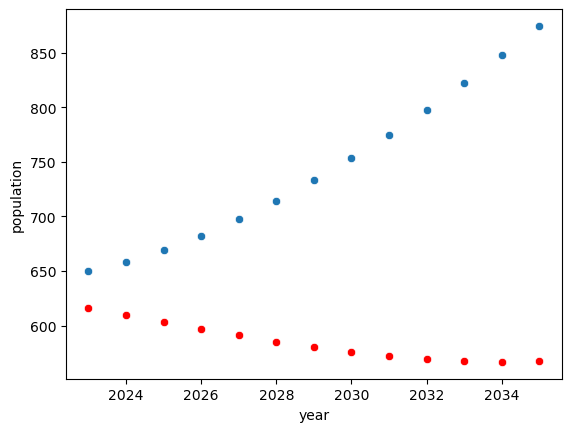

In [54]:
sns.scatterplot(data=Bulawayo_df,x="year",y="population")
sns.scatterplot(data=Bulawayo_df,x="year",y="predicted_poly",color='red')


In [154]:
from sklearn.ensemble import GradientBoostingRegressor
SEED = 30
gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1,
                                random_state = SEED,
                                max_features = 5)
 

In [155]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(loss='absolute_error', max_depth=1, max_features=5,
                          n_estimators=300, random_state=30)

In [156]:
y_pred_gbr = gbr.predict(X_train)

In [157]:
mean_squared_error(y_train,y_pred_gbr)

39579.544725714346

In [158]:
gbr.fit(X_test,y_test)

GradientBoostingRegressor(loss='absolute_error', max_depth=1, max_features=5,
                          n_estimators=300, random_state=30)

In [159]:
y_pred_g = gbr.predict(X_test)
predicted = pd.DataFrame(y_pred_g,columns=['predicted'])

In [160]:
mean_squared_error(y_test,y_pred_g)

4775.49540283151

In [161]:
r2_score(y_test,y_pred_g)

0.9864720453454079

In [162]:
df_gnb = pd.merge(y_pop,predicted,how = 'left',left_index = True, right_index = True)

In [163]:
df_gnb

,population,year,City_Bulawayo,City_Chitungwiza,City_Harare,predicted
0,649.509,2023,1,0,0,656.308835
1,403.714,2023,0,1,0,383.944466
2,1578.128,2023,0,0,1,1695.281212
3,658.028,2024,1,0,0,657.595456
4,411.186,2024,0,1,0,385.231087
5,1603.201,2024,0,0,1,1696.567833
6,668.949,2025,1,0,0,668.949005
7,419.611,2025,0,1,0,396.584636
8,1633.019,2025,0,0,1,1707.921382
9,682.123,2026,1,0,0,681.732489


In [164]:
City_Bulawayo=df_gnb[df_gnb['City_Bulawayo'] == 1]

City_Bulawayo= City_Bulawayo.reset_index()
City_Bulawayo=City_Bulawayo.drop(columns =['index'])

<AxesSubplot:xlabel='year', ylabel='population'>

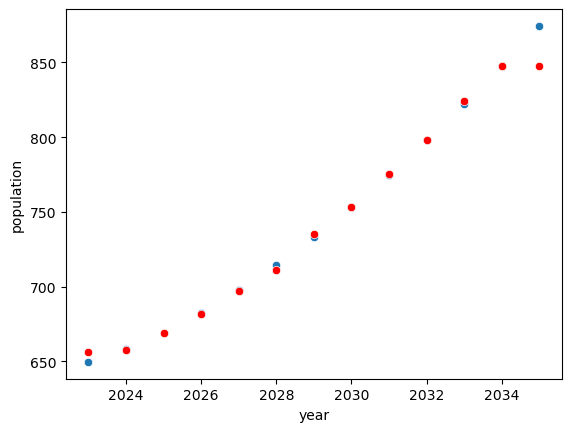

In [165]:
sns.scatterplot(data=City_Bulawayo,x="year",y="population")
sns.scatterplot(data=City_Bulawayo,x="year",y="predicted",color='red')

Gradient boosting is showing good results